In [1]:
import pickle
import numpy as np

import sys
sys.path.append('../../')
import ndrought.drought_network as dnet
import ndrought.wrangle as dnw

import matplotlib as mpl
import matplotlib.pyplot as plt

import pandas as pd
import xarray as xr

/pool0/data/steinjao/drought/drought_impact/notebooks/analysis/../../ndrought/wrangle.py:17: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
dt_path = '/pool0/home/steinjao/data/drought/drought_impact/data/drought_measures/ndrought_products/CONUS_105W/drought_tracks'

In [3]:
usdm_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/USDM_tracks.pickle')

In [4]:
spi30d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_30d_tracks.pickle')

In [5]:
spi180d_dtd = dnw.convert_pickle_to_dtd(f'{dt_path}/spi_180d_tracks.pickle')

In [6]:
usdm_summ, usdm_summ_grp = dnw.compute_track_summary_characterization(usdm_dtd, 7)

In [7]:
spi30d_summ, spi30d_summ_grp = dnw.compute_track_summary_characterization(spi30d_dtd, 5)

In [8]:
spi180d_summ, spi180d_summ_grp = dnw.compute_track_summary_characterization(spi180d_dtd, 5)

In [9]:
usdm_summ_grp['lifetime'].round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",19.0,21.0,28,7,7.0,83
"(30, 60]",41.0,35.0,56,35,8.0,41
"(60, 90]",69.0,70.0,84,63,7.0,12
"(90, 180]",129.0,126.0,175,91,23.0,53
"(180, 365]",254.0,231.0,350,182,51.0,37
"(365, 730]",499.0,469.0,721,378,116.0,26
"(730, 1825]",1122.0,959.0,1736,735,361.0,21
"(1825, 8141]",4013.0,3752.0,7854,1834,1836.0,31


In [10]:
spi30d_summ_grp['lifetime'].round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",16.0,15.0,30.0,5.0,8.0,520
"(30, 60]",46.0,45.0,60.0,35.0,8.0,224
"(60, 90]",76.0,75.0,90.0,65.0,8.0,114
"(90, 180]",122.0,115.0,180.0,95.0,22.0,179
"(180, 365]",203.0,195.0,260.0,185.0,20.0,28
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [11]:
spi180d_summ_grp['lifetime'].round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",12.0,10.0,30.0,5.0,7.0,155
"(30, 60]",45.0,45.0,60.0,35.0,8.0,48
"(60, 90]",76.0,75.0,90.0,65.0,8.0,27
"(90, 180]",141.0,145.0,180.0,95.0,26.0,60
"(180, 365]",265.0,260.0,365.0,185.0,54.0,78
"(365, 730]",468.0,440.0,695.0,370.0,79.0,65
"(730, 1825]",1080.0,1000.0,1570.0,770.0,224.0,33
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [12]:
(usdm_summ_grp['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",13.0,0.0,679.0,0.0,78.0,0.0
"(30, 60]",18.0,0.0,296.0,0.0,62.0,0.0
"(60, 90]",106.0,0.0,931.0,0.0,266.0,0.0
"(90, 180]",266.0,0.0,3994.0,0.0,797.0,0.0
"(180, 365]",786.0,0.0,5827.0,0.0,1362.0,0.0
"(365, 730]",3560.0,0.0,11114.0,0.0,4606.0,0.0
"(730, 1825]",13676.0,12595.0,22652.0,0.0,8222.0,0.0
"(1825, 8141]",45651.0,51559.0,92506.0,0.0,29901.0,0.0


In [13]:
(spi30d_summ_grp['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",823.0,367.0,5788.0,11.0,1073.0,1.0
"(30, 60]",3796.0,3539.0,13107.0,178.0,2216.0,0.0
"(60, 90]",6693.0,5940.0,14541.0,1788.0,3207.0,0.0
"(90, 180]",12341.0,11699.0,23873.0,1677.0,4546.0,0.0
"(180, 365]",21753.0,19211.0,30278.0,15021.0,4814.0,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [14]:
(spi180d_summ_grp['distance']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",161.0,73.0,1194.0,9.0,210.0,0.0
"(30, 60]",767.0,447.0,3654.0,136.0,734.0,0.0
"(60, 90]",2315.0,978.0,6734.0,143.0,2231.0,0.0
"(90, 180]",3753.0,3120.0,11076.0,333.0,2762.0,0.0
"(180, 365]",10211.0,10620.0,20429.0,1308.0,5610.0,0.0
"(365, 730]",20323.0,18347.0,40991.0,3841.0,8070.0,0.0
"(730, 1825]",58186.0,57743.0,74829.0,37919.0,9465.0,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [15]:
(usdm_summ_grp['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",10.0,0.0,507.0,0.0,58.0,0.0
"(30, 60]",5.0,0.0,67.0,0.0,15.0,0.0
"(60, 90]",37.0,0.0,189.0,0.0,63.0,0.0
"(90, 180]",55.0,0.0,804.0,0.0,171.0,0.0
"(180, 365]",240.0,0.0,1890.0,0.0,471.0,0.0
"(365, 730]",582.0,0.0,2073.0,0.0,810.0,0.0
"(730, 1825]",1189.0,1119.0,2348.0,0.0,841.0,0.0
"(1825, 8141]",1019.0,1008.0,2425.0,0.0,914.0,0.0


In [16]:
(spi30d_summ_grp['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",260.0,150.0,1542.0,1.0,284.0,1.0
"(30, 60]",689.0,656.0,1694.0,33.0,395.0,0.0
"(60, 90]",760.0,727.0,1729.0,40.0,375.0,0.0
"(90, 180]",941.0,985.0,1935.0,136.0,454.0,0.0
"(180, 365]",915.0,1054.0,1933.0,99.0,445.0,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [17]:
(spi180d_summ_grp['displacement']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",82.0,33.0,683.0,3.0,124.0,0.0
"(30, 60]",190.0,139.0,845.0,11.0,172.0,0.0
"(60, 90]",317.0,172.0,1343.0,30.0,345.0,0.0
"(90, 180]",439.0,345.0,1615.0,18.0,380.0,0.0
"(180, 365]",755.0,699.0,2003.0,47.0,421.0,0.0
"(365, 730]",898.0,888.0,1800.0,126.0,472.0,0.0
"(730, 1825]",985.0,1035.0,1911.0,71.0,494.0,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [18]:
(usdm_summ_grp['average velocity']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",1.0,0.0,32.0,0.0,4.0,0.0
"(30, 60]",0.0,0.0,6.0,0.0,1.0,0.0
"(60, 90]",2.0,0.0,13.0,0.0,4.0,0.0
"(90, 180]",2.0,0.0,34.0,0.0,6.0,0.0
"(180, 365]",3.0,0.0,19.0,0.0,5.0,0.0
"(365, 730]",6.0,0.0,16.0,0.0,7.0,0.0
"(730, 1825]",12.0,14.0,16.0,0.0,6.0,0.0
"(1825, 8141]",10.0,12.0,15.0,0.0,6.0,0.0


In [19]:
(spi30d_summ_grp['average velocity']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",46.0,27.0,305.0,1.0,50.0,1.0
"(30, 60]",84.0,74.0,225.0,5.0,49.0,0.0
"(60, 90]",87.0,77.0,171.0,28.0,39.0,0.0
"(90, 180]",101.0,98.0,183.0,17.0,31.0,0.0
"(180, 365]",107.0,101.0,152.0,79.0,21.0,0.0
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0.0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [20]:
(spi180d_summ_grp['average velocity']/1e3).round()

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",15.0,7.0,123.0,1.0,19.0,0.0
"(30, 60]",17.0,10.0,61.0,3.0,14.0,0.0
"(60, 90]",30.0,14.0,86.0,2.0,29.0,0.0
"(90, 180]",28.0,23.0,71.0,2.0,21.0,0.0
"(180, 365]",38.0,38.0,70.0,6.0,18.0,0.0
"(365, 730]",42.0,43.0,66.0,8.0,12.0,0.0
"(730, 1825]",54.0,53.0,64.0,47.0,5.0,0.0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0.0


In [21]:
usdm_summ_grp['similarity'].round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.982,1.000,1.0,0.672,0.063,83
"(30, 60]",0.970,1.000,1.0,0.651,0.080,41
"(60, 90]",0.942,0.996,1.0,0.814,0.080,12
"(90, 180]",0.966,1.000,1.0,0.692,0.076,53
"(180, 365]",0.952,1.000,1.0,0.805,0.064,37
"(365, 730]",0.964,1.000,1.0,0.901,0.044,26
"(730, 1825]",0.910,0.897,1.0,0.871,0.046,21
"(1825, 8141]",0.934,0.917,1.0,0.903,0.036,31


In [22]:
spi30d_summ_grp['similarity'].round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.595,0.591,0.976,0.060,0.173,520
"(30, 60]",0.510,0.502,0.824,0.278,0.104,224
"(60, 90]",0.516,0.508,0.674,0.370,0.072,114
"(90, 180]",0.498,0.488,0.654,0.365,0.057,179
"(180, 365]",0.489,0.485,0.574,0.467,0.021,28
"(365, 730]",NaN,NaN,NaN,NaN,NaN,0
"(730, 1825]",NaN,NaN,NaN,NaN,NaN,0
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


In [23]:
spi180d_summ_grp['similarity'].round(3)

,mean,median,max,min,std,count
lifetime,,,,,,
"(0, 30]",0.743,0.773,0.981,0.225,0.149,155
"(30, 60]",0.713,0.710,0.865,0.515,0.086,48
"(60, 90]",0.706,0.702,0.880,0.528,0.105,27
"(90, 180]",0.733,0.735,0.889,0.588,0.089,60
"(180, 365]",0.728,0.730,0.865,0.621,0.064,78
"(365, 730]",0.725,0.725,0.850,0.672,0.034,65
"(730, 1825]",0.710,0.711,0.718,0.703,0.004,33
"(1825, 8141]",NaN,NaN,NaN,NaN,NaN,0


## Boxplots

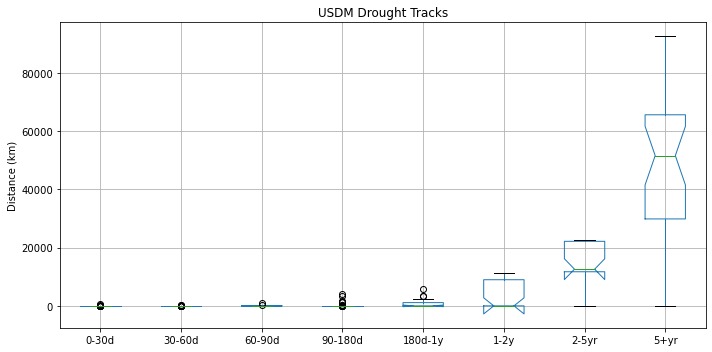

In [24]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['distance']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("USDM Drought Tracks")

plt.tight_layout()

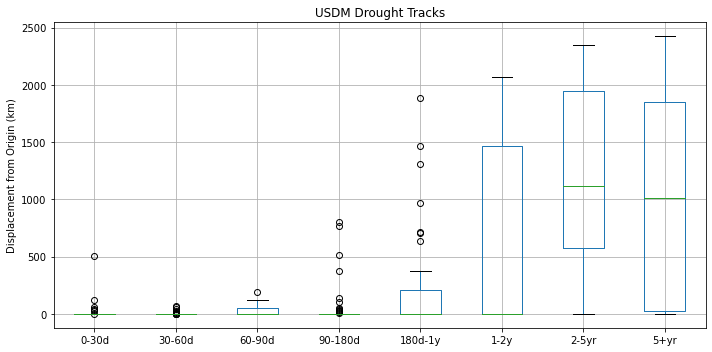

In [25]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['displacement']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=False)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

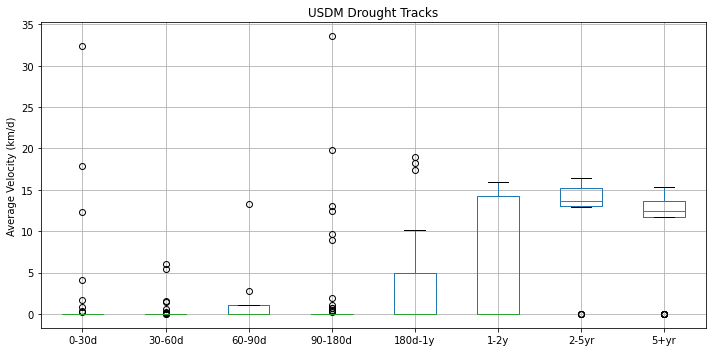

In [26]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['average velocity']/1e3).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=False)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

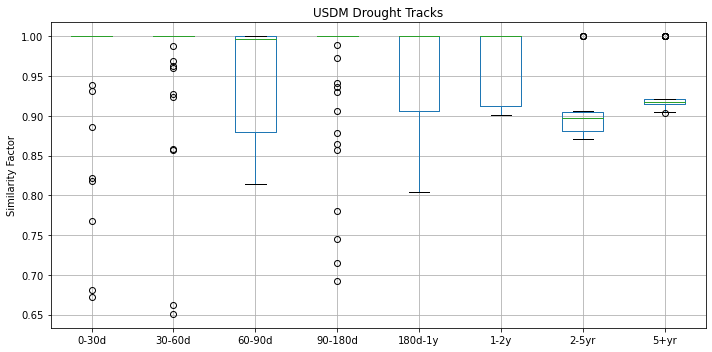

In [27]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(usdm_summ['similarity']).groupby(pd.cut(usdm_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("USDM Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

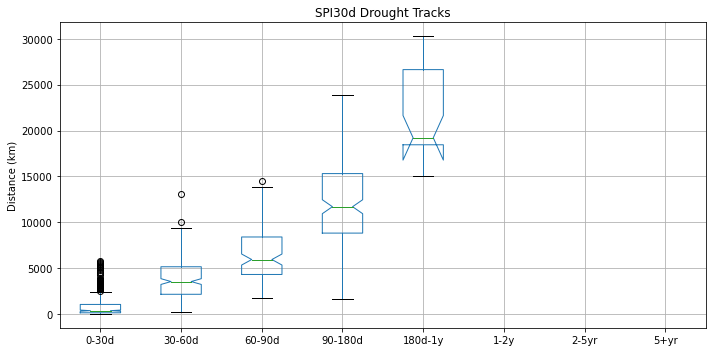

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['distance']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("SPI30d Drought Tracks")

plt.tight_layout()

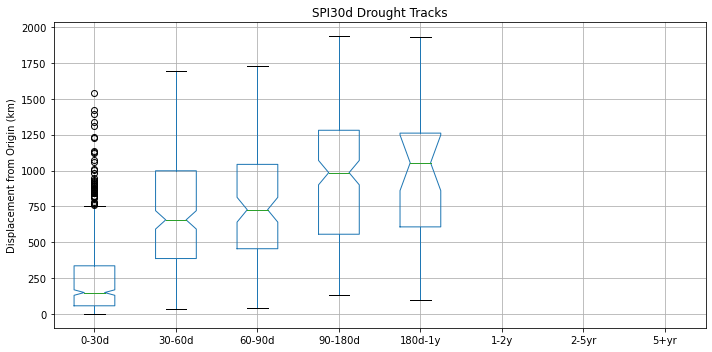

In [29]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['displacement']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

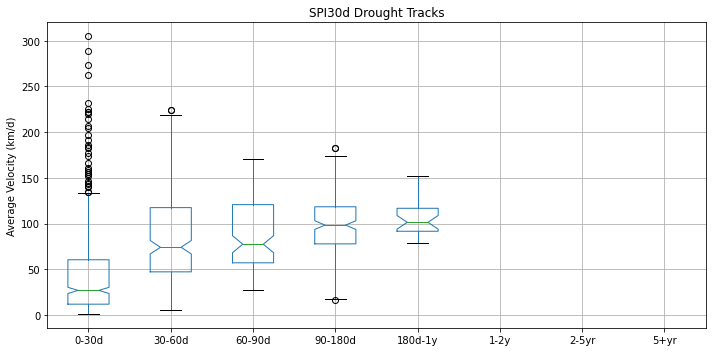

In [30]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['average velocity']/1e3).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

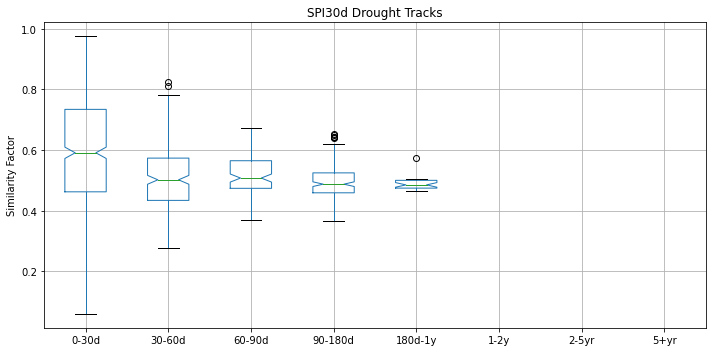

In [31]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi30d_summ['similarity']).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("SPI30d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

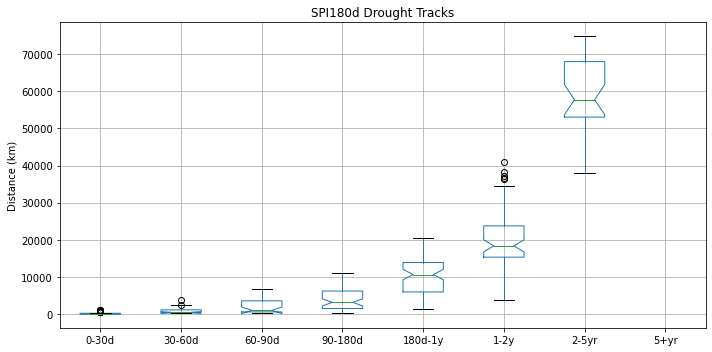

In [32]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['distance']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])
ax.set_ylabel('Distance (km)')
ax.set_title("SPI180d Drought Tracks")

plt.tight_layout()

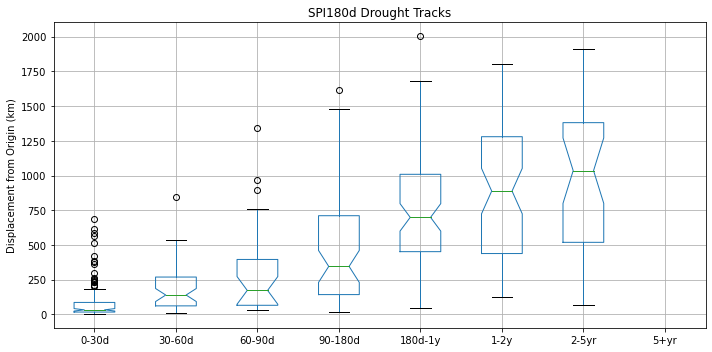

In [33]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['displacement']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Displacement from Origin (km)')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

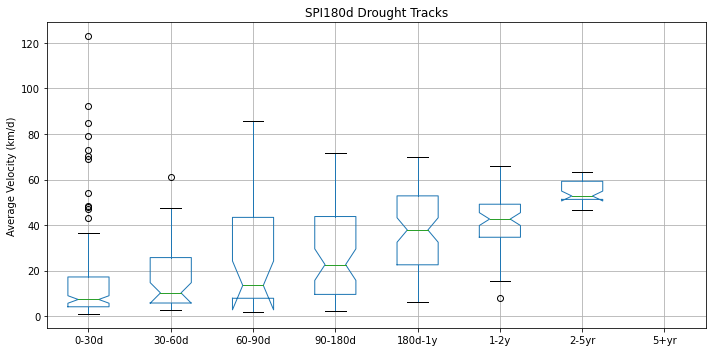

In [34]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['average velocity']/1e3).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Average Velocity (km/d)')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

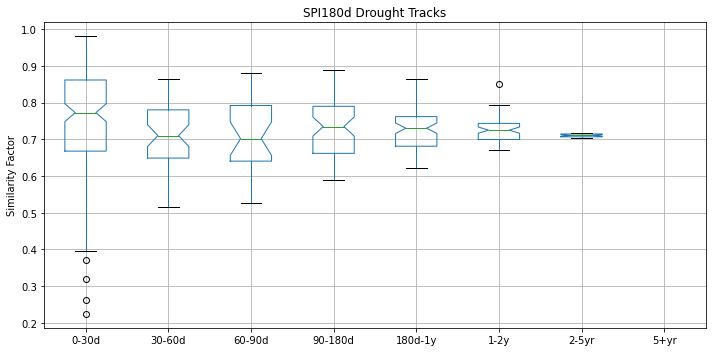

In [35]:
fig, ax = plt.subplots(figsize=(10,5))

pd.DataFrame(spi180d_summ['similarity']).groupby(pd.cut(spi180d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).boxplot('lifetime', ax=ax, notch=True)

ax.tick_params(axis='both', rotation=0)
ax.set_ylabel('Similarity Factor')
ax.set_title("SPI180d Drought Tracks")

ax.set_xticklabels(["0-30d", "30-60d","60-90d","90-180d","180d-1y","1-2y","2-5yr","5+yr"])

plt.tight_layout()

In [36]:
intervals = list(set(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])))
intervals

[Interval(90.0, 180.0, closed='right'),
 Interval(180.0, 365.0, closed='right'),
 Interval(30.0, 60.0, closed='right'),
 nan,
 Interval(60.0, 90.0, closed='right'),
 Interval(0.0, 30.0, closed='right')]

In [37]:
pd.DataFrame(spi180d_summ).groupby(pd.cut(spi30d_summ.lifetime, bins=[0, 30, 60, 90, 180, 365, 730, 1825, 7*1163])).get_group(intervals[0])

,lifetime,distance,displacement,average velocity,similarity
0,315,1.401722e+07,516670.055125,4.449911e+04,0.692463
1,315,1.381587e+07,647315.707839,4.385989e+04,0.692499
2,0,2.391898e+04,23918.983755,inf,0.981283
3,10,8.903244e+04,46953.229829,8.903244e+03,0.697220
10,190,8.742620e+06,521403.367989,4.601379e+04,0.685925
...,...,...,...,...,...
557,60,7.466262e+05,153515.548973,1.244377e+04,0.687422
558,45,4.340645e+05,116435.505496,9.645877e+03,0.764529
559,0,5.026305e+03,5026.305114,inf,0.932666
560,25,4.735992e+05,385674.612061,1.894397e+04,0.680219


Okay, neat. So if I want to make a summarizing plot, then I can technically do that. Gonna be annoying, but it's possible. Or if I just want to get more info based on the groupings

## Origin / Termination

In [38]:
def get_origins(x_track, y_track):
    x_origins = [x[0] for x in x_track]
    y_origins = [y[0] for y in y_track]
    
    return x_origins, y_origins

def get_terminations(x_track, y_track, u_track, v_track):
    x_termination = [x[-1]+u[-1] for x, u in zip(x_track, u_track)]
    y_termination = [y[-1]+v[-1] for y, v in zip(y_track, v_track)]

    return x_termination, y_termination

In [39]:
usdm_x_origins, usdm_y_origins = get_origins(usdm_dtd['x'], usdm_dtd['y'])

In [40]:
usdm_x_terminations, usdm_y_terminations = get_terminations(
    usdm_dtd['x'],
    usdm_dtd['y'],
    usdm_dtd['u'],
    usdm_dtd['v']
)

In [41]:
spi30d_x_origins, spi30d_y_origins = get_origins(spi30d_dtd['x'], spi30d_dtd['y'])
spi30d_x_terminations, spi30d_y_terminations = get_terminations(
    spi30d_dtd['x'],
    spi30d_dtd['y'],
    spi30d_dtd['u'],
    spi30d_dtd['v']
)

In [42]:
spi180d_x_origins, spi180d_y_origins = get_origins(spi180d_dtd['x'], spi180d_dtd['y'])
spi180d_x_terminations, spi180d_y_terminations = get_terminations(
    spi180d_dtd['x'],
    spi180d_dtd['y'],
    spi180d_dtd['u'],
    spi180d_dtd['v']
)

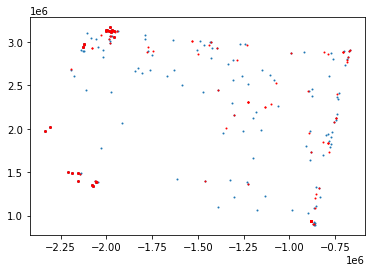

In [43]:
fig, ax = plt.subplots()

ax.scatter(usdm_x_origins, usdm_y_origins, s=1)
ax.scatter(usdm_x_terminations, usdm_y_terminations, s=1, c='r')

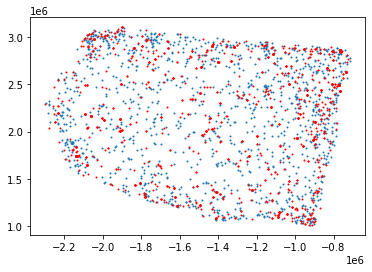

In [44]:
fig, ax = plt.subplots()

ax.scatter(spi30d_x_origins, spi30d_y_origins, s=1)
ax.scatter(spi30d_x_terminations, spi30d_y_terminations, s=1, c='r')

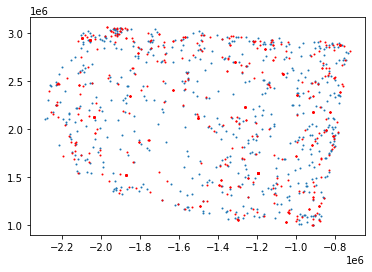

In [45]:
fig, ax = plt.subplots()

ax.scatter(spi180d_x_origins, spi180d_y_origins, s=1)
ax.scatter(spi180d_x_terminations, spi180d_y_terminations, s=1, c='r')

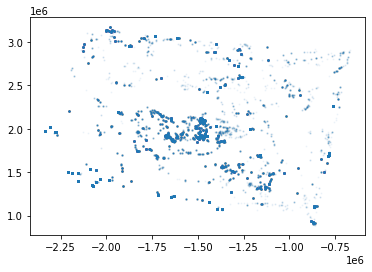

In [46]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(usdm_dtd['x']), np.hstack(usdm_dtd['y']), alpha=0.05, s=1)

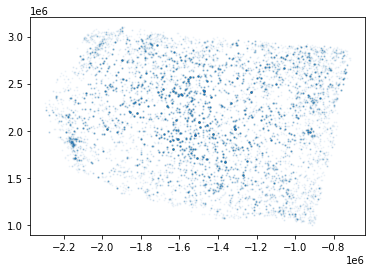

In [47]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(spi30d_dtd['x']), np.hstack(spi30d_dtd['y']), alpha=0.05, s=1)

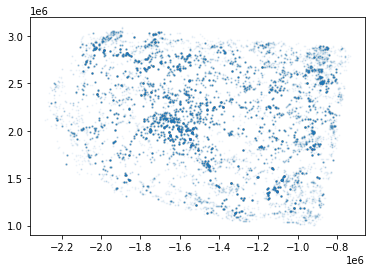

In [48]:
fig, ax = plt.subplots()


ax.scatter(np.hstack(spi180d_dtd['x']), np.hstack(spi180d_dtd['y']), alpha=0.05, s=1)

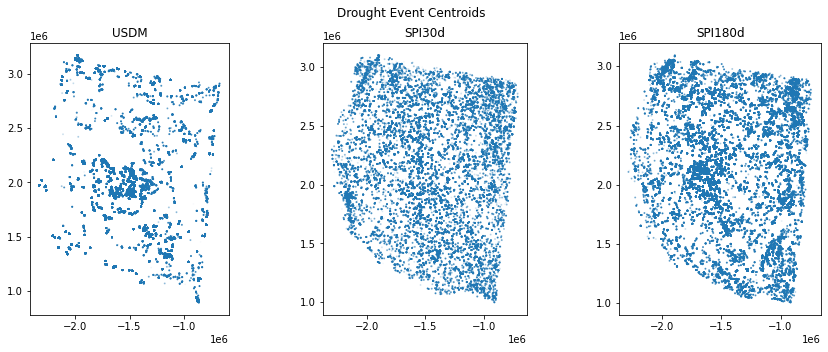

In [49]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, data, title in zip(
    axs.ravel(), 
    [usdm_dtd, spi30d_dtd, spi180d_dtd],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(np.hstack(data['x']), np.hstack(data['y']), alpha=np.hstack(data['a']), s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Centroids')
fig.set_facecolor('w')

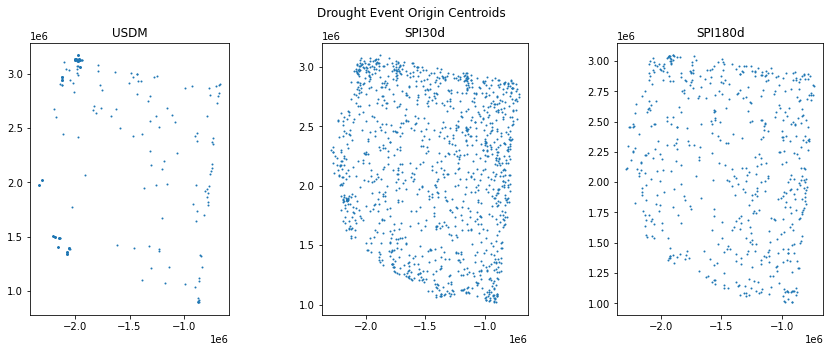

In [50]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, x_origins, y_origins, title in zip(
    axs.ravel(), 
    [usdm_x_origins, spi30d_x_origins, spi180d_x_origins],
    [usdm_y_origins, spi30d_y_origins, spi180d_y_origins],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(x_origins, y_origins, s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Origin Centroids')
fig.set_facecolor('w')

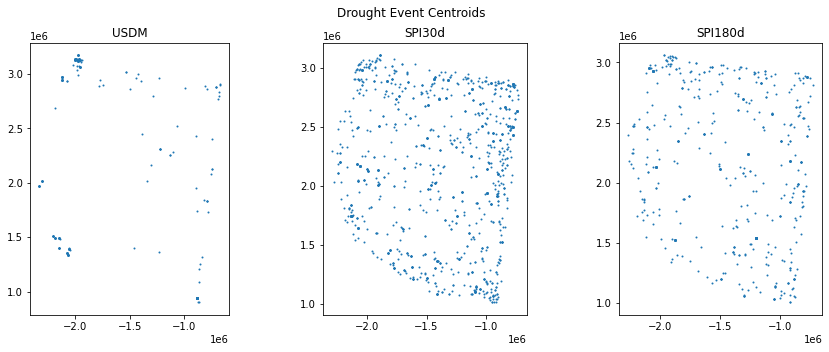

In [51]:
fig, axs = plt.subplots(1,3, figsize=(15,5))

for ax, x_terminations, y_terminations, title in zip(
    axs.ravel(), 
    [usdm_x_terminations, spi30d_x_terminations, spi180d_x_terminations],
    [usdm_y_terminations, spi30d_y_terminations, spi180d_y_terminations],
    ['USDM', 'SPI30d', 'SPI180d']
):
    ax.scatter(x_terminations, y_terminations, s=1)
    ax.set_aspect('equal')
    ax.set_title(title)

fig.suptitle('Drought Event Centroids')
fig.set_facecolor('w')

## Extract a track

In [52]:
usdm = xr.open_dataset('/pool0/home/steinadi/data/drought/drought_impact/data/drought_measures/usdm/USDM_CONUS_105W_20000104_20220412.nc')

In [53]:
usdm.isel(time=840)

<xarray.Dataset>
Dimensions:      (x: 897, y: 1214)
Coordinates:
  * x            (x) float64 -2.955e+06 -2.952e+06 ... -6.62e+05 -6.595e+05
  * y            (y) float64 3.281e+06 3.279e+06 ... 1.764e+05 1.739e+05
    time         datetime64[ns] 2016-02-09
Data variables:
    spatial_ref  int64 ...
    USDM         (y, x) float64 ...
Attributes:
    compilation:  a. stein, 1/18/2023
    description:  weekly gridded United States Drought Monitor (USDM) from 1/...
    source:       https://www1.ncdc.noaa.gov/pub/data/nidis/geojson/us/usdm-t...
    crs:          EPSG:5070
    join:         lat, lon taken from 2000-01-04 file
    clipping:     original data was clipped to CONUS using http://eric.clst.o...

In [54]:
usdm_dtd['t']

[array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([19, 20, 21, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36]),
 array([26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]),
 array([26]),
 array([26]),
 array([33, 34, 35, 36]),
 array([35, 36]),
 array([  39,   39,   40, ..., 1160, 1161, 1161]),
 array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]),
 array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]),
 array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91]),
 array([58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74,
        75, 76, 77, 7

In [55]:
eligible_tracks = dict()
track_id = []

for i, track in enumerate(usdm_dtd['t']):
    if 731 in track and 800 in track:
        eligible_tracks[i] = track
        track_id.append(i)

In [56]:
len(eligible_tracks)

26

In [57]:
eligible_tracks

{7: array([  39,   39,   40, ..., 1160, 1161, 1161]),
 21: array([  77,   78,   79, ..., 1160, 1161, 1161]),
 23: array([ 121,  122,  123, ..., 1160, 1161, 1161]),
 69: array([ 268,  269,  270, ..., 1160, 1161, 1161]),
 72: array([ 283,  284,  285, ..., 1160, 1161, 1161]),
 73: array([ 334,  335,  336, ..., 1160, 1161, 1161]),
 74: array([ 342,  343,  344, ..., 1160, 1161, 1161]),
 98: array([ 380,  381,  382, ..., 1160, 1161, 1161]),
 100: array([ 402,  403,  404, ..., 1160, 1161, 1161]),
 130: array([ 496,  497,  498, ..., 1160, 1161, 1161]),
 131: array([ 500,  501,  502, ..., 1160, 1161, 1161]),
 133: array([ 502,  503,  504, ..., 1160, 1161, 1161]),
 134: array([ 502,  503,  504, ..., 1160, 1161, 1161]),
 140: array([ 560,  561,  562, ..., 1160, 1161, 1161]),
 141: array([ 570,  571,  572, ..., 1160, 1161, 1161]),
 142: array([ 625,  626,  627, ..., 1160, 1161, 1161]),
 146: array([ 650,  651,  652, ..., 1160, 1161, 1161]),
 147: array([ 651,  652,  653, ..., 1160, 1161, 1161]),
 

In [58]:
track_id

[7,
 21,
 23,
 69,
 72,
 73,
 74,
 98,
 100,
 130,
 131,
 133,
 134,
 140,
 141,
 142,
 146,
 147,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161]

Let's nab 154

In [59]:
sample_track = 147

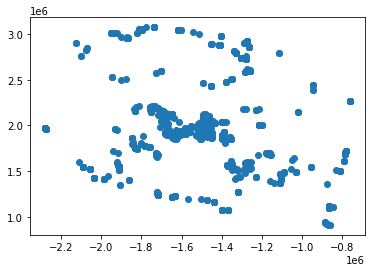

In [60]:
fig, ax = plt.subplots()

ax.scatter(usdm_dtd['x'][sample_track], usdm_dtd['y'][sample_track])